<a href="https://colab.research.google.com/github/JagtapT/Deep-Learning-6th-July/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification problem**

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the dataset

In [3]:
import pandas as pd
url1="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_train.csv"
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# Basic data quality checks

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(42100, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Separate X and Y(booking_status)

In [8]:
X = df.drop(columns=["id","booking_status"])
Y = df[["booking_status"]]

In [9]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [10]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Perform preprocessing on X data

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


# Apply train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [15]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [16]:
xtest.shape

(8420, 17)

In [17]:
xtrain.shape

(33680, 17)

In [18]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [19]:
ytrain.shape

(33680, 1)

In [20]:
ytest.shape

(8420, 1)

# Building a neural network


*   Dropout layer - Randomly drop some % of neuron links



In [21]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [22]:
# Initialize the model
model = Sequential()

#Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden layer 1
model.add(Dense(64, activation='relu'))
# Add dropout layer
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32, activation='relu'))

# Add dropout layer
model.add(Dropout(0.3))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam')

In [25]:
hist = model.fit(xtrain,ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 [==============================] - 7s 4ms/step - loss: 0.5258 - accuracy: 0.7394 - val_loss: 0.4807 - val_accuracy: 0.7718
Epoch 2/60
842/842 [==============================] - 4s 4ms/step - loss: 0.4879 - accuracy: 0.7711 - val_loss: 0.4756 - val_accuracy: 0.7727
Epoch 3/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4776 - accuracy: 0.7767 - val_loss: 0.4717 - val_accuracy: 0.7785
Epoch 4/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4741 - accuracy: 0.7782 - val_loss: 0.4704 - val_accuracy: 0.7770
Epoch 5/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4690 - accuracy: 0.7811 - val_loss: 0.4643 - val_accuracy: 0.7861
Epoch 6/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4661 - accuracy: 0.7832 - val_loss: 0.4631 - val_accuracy: 0.7858
Epoch 7/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4670 - accuracy: 0.7840 - val_loss: 0.4615 - val_accuracy: 0.7904
Epoch 

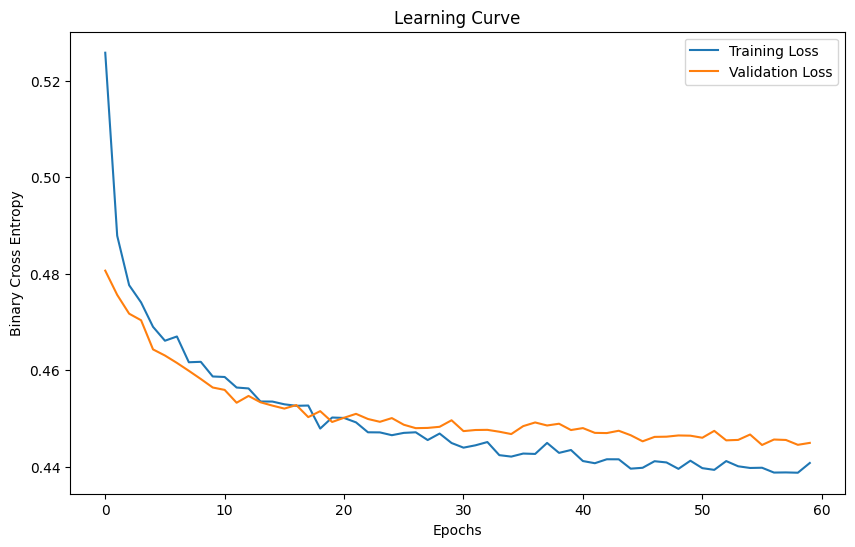

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [28]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 4s 4ms/step - loss: 0.4239 - accuracy: 0.8096


[0.4238690435886383, 0.809649646282196]

In [29]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.8076


[0.42964670062065125, 0.8076009750366211]

# Get predictions on train and test data

In [31]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 0s 1ms/step


In [32]:
yprob_train[0:5]

array([[0.00520177],
       [0.17919014],
       [0.852279  ],
       [0.76876116],
       [0.8541019 ]], dtype=float32)

In [33]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [34]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in ypred_test]

In [35]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [36]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [37]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [38]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Confusion Matrix

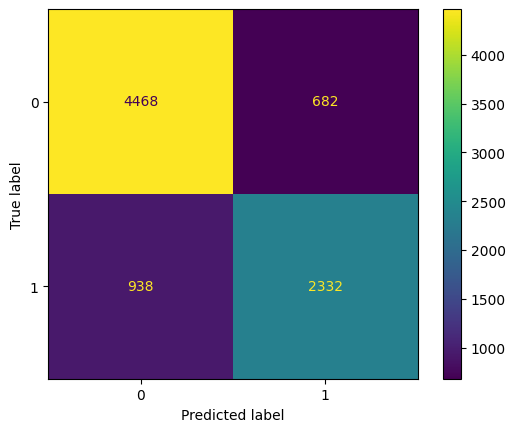

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)


In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5150
           1       0.77      0.71      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.81      8420



In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_test)

0.8773847272943204

## Out of Sample Predictions

In [42]:
url2="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [43]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [44]:
xnew2_pre = num_pipe.fit_transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.061087,-0.314961,0.126652,1.149127,-0.402773,-0.1666,0.685799,0.088181,0.408978,1.559433,-1.216381,0.435667,-0.178001,-0.060829,-0.101336,0.297557,1.853010
1,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-1.008778,-2.445121,0.853184,0.574448,-1.154075,-0.178001,-0.060829,-0.101336,-0.533552,-0.745231
2,0.160920,4.156621,-1.011996,-0.988861,-0.402773,-0.1666,3.094937,-1.058079,0.408978,0.146934,-0.656747,0.435667,-0.178001,-0.060829,-0.101336,3.676312,0.553890
3,0.160920,-0.314961,-1.011996,0.436464,-0.402773,-0.1666,-0.518770,-0.195303,0.408978,-0.912440,1.581790,-1.154075,-0.178001,-0.060829,-0.101336,-0.648983,-0.745231
4,-1.739248,-0.314961,-1.011996,-0.276199,3.038115,-0.1666,-0.518770,-1.193658,0.408978,0.500059,0.574448,0.435667,-0.178001,-0.060829,-0.101336,1.068913,-0.745231


In [45]:
probs = model.predict(xnew2_pre)

878/878 [==============================] - 1s 1ms/step


In [46]:
probs[0:5]

array([[0.09432581],
       [0.03357532],
       [0.33928037],
       [0.14774866],
       [0.5027682 ]], dtype=float32)

In [47]:
preds = [1 if prob>=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [48]:
df_final = xnew[['id']]
df_final['booking_status'] = preds
df_final['probability'] = probs

In [49]:
df_final

,id,booking_status,probability
0,42100,0,0.094326
1,42101,0,0.033575
2,42102,0,0.339280
3,42103,0,0.147749
4,42104,1,0.502768
...,...,...,...
28063,70163,1,0.983612
28064,70164,0,0.062049
28065,70165,0,0.160865
28066,70166,0,0.436297


In [50]:
df_final['booking_status'].value_counts()

booking_status
0    18155
1     9913
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

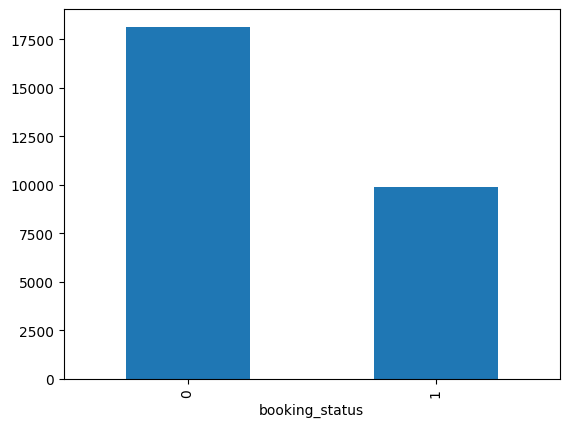

In [51]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [52]:
df_final.to_csv("Results.csv", index=False)